In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def gaussian_pdf(x, mu, sigma):

    """
    Calculate gaussian probability density for x with mean mu and standard deviation sigma.
    """

    pdf = ((1 / np.sqrt(2 * np.pi * sigma **2)) * 
           np.exp(-1 / sigma ** 2 * (x - mu) ** 2))
    
    return pdf


class EMAlgorithm:

    """
    Class that implements the EM algorithm. This can be applied for gaussian mixture models that consists 
    of K different gaussians.

    parameters:
    
    sample_func: Function to sample the data (generative model)
    N: Number of data points
    K_gaussians: Number of mixture components
    initial_mu: Initial mean value
    initial_sigma: Initial value for the standard deviation
    conv_thr: Convergence threshold for the log-likelyhood
    max_steps: maximum number of iterations


    """
    
    def __init__(self, sample_func, N, K_gaussians, initial_mu=0.0,
                 initial_sigma=6.0, conv_thr=0.000001, max_steps=100):
        
        self.K_gaussians = K_gaussians
        self.x = sample_func(N)
        self.sigma = [initial_sigma] * self.K_gaussians
        self.mu = [initial_mu] * self.K_gaussians
        self.N= N
        self.r = None
        self.conv_thr = conv_thr
        self.max_steps = max_steps
        self.pi = np.random.uniform(size=self.K_gaussians) 
        self.pi /= self.pi.sum()

    def _calc_r_denomin(self):

        """
        Calculate denominator for the update rule of r.
        """

        nom = np.array([(1 / np.sqrt(2 * np.pi * self.sigma[i] ** 2) *
                        np.exp(-1 / (2 * self.sigma[i] ** 2) * 
                        (self.x - self.mu[i]) ** 2)) * self.pi[i] for i 
                        in range(self.K_gaussians)]).sum(axis=0)
            
        return nom

    def _expectation_step(self):
        
        """
        Performs one expectation step.
        """

        denominator = self._calc_r_denomin()

        self.r = [((1 / np.sqrt(2 * np.pi * self.sigma[i] ** 2) *
                   np.exp(-1 / (2 * self.sigma[i] ** 2) * 
                    (self.x - self.mu[i]) ** 2)) * self.pi[i] / denominator
                     
                
                 ) for i in range(self.K_gaussians)]
    
    def _maximization_step(self):
        
        """
        Performs one maximization step.
        """

        self.pi = [1 / self.N * self.r[i].sum() for i in range(self.K_gaussians)]
        self.mu = [(self.x * self.r[i]).sum() / self.r[i].sum() for i in range(self.K_gaussians)]
        self.sigma = np.sqrt([(((self.x - self.mu[i]) ** 2) * self.r[i]).sum() / self.r[i].sum() 
                                for i in range(self.K_gaussians)])
    
    def _calculate_gaussian_mixture(self):

        """
        Calculate the probability given by a gaussian mixture.
        """

        p = np.array([self.pi[i] * gaussian_pdf(self.x, self.mu[i], self.sigma[i]) 
                      for i in range(self.K_gaussians)]).sum(axis=0)

        return p

    def _calculate_log_likelyhood(self):

        """
        Calculate the log-likelyhood.        
        """

        p = self._calculate_gaussian_mixture()
        log_likelyhood = np.log(p).sum()
        
        return log_likelyhood
    
    def run(self, print_=True, return_=True, conv=False):

        """
        Run the EM algorithm.

        parameters:

        print_: Whether to print the log-likelyhood in each step
        return_: Whether to return the list of log-likelyhoods
        conv: Whether to consider the convergence of the log-likelyhood to stop the iterations. If False,
              only the maximum number of steps is considered.
        """
        
        converged = False
        step = 0
        log_likelyhood = self._calculate_log_likelyhood()
        log_likelyhood_list = [log_likelyhood]
        
        if print_:
                print(f"step {step}: {log_likelyhood}")
        
        while not converged and step < self.max_steps:
            
            self._expectation_step()
            self._maximization_step()
            
            prev_log_likelyhood = log_likelyhood
            log_likelyhood = self._calculate_log_likelyhood()
            log_likelyhood_list.append(log_likelyhood)
            step += 1
            
            if print_:
                print(f"step {step}: {log_likelyhood}")
            
            if np.abs(log_likelyhood - prev_log_likelyhood) < self.conv_thr and conv:
                converged = True

        if return_:
            return log_likelyhood_list
    
    def return_final_parameters(self):

        """
        Return the final parameters for the gaussian mixture.
        """
        
        return {"pi": self.pi, "mu": self.mu, "sigma": self.sigma}

In [13]:
# Sample data from gaussian distribution with mean 20 and standard deviation 2
def gen_samples(N): return np.random.normal(loc=20, scale=2, size=N)

def gen_samples_2(N, parameters):

    """
    Generates data from a gaussian mixture with two components.
    """

    randoms = np.random.uniform(size=N)

    mixture = np.array([np.random.normal(loc=20, scale=2, size=1) if r < 0.25 
                        else np.random.normal(loc=10, scale=1, size=1) for r in randoms])

    return mixture.flatten()

In [14]:
# EM algorithm for 100 samples
EM = EMAlgorithm(sample_func=gen_samples, N=100, K_gaussians=1, max_steps=40)

# Task A

In [15]:
sample = EM.x

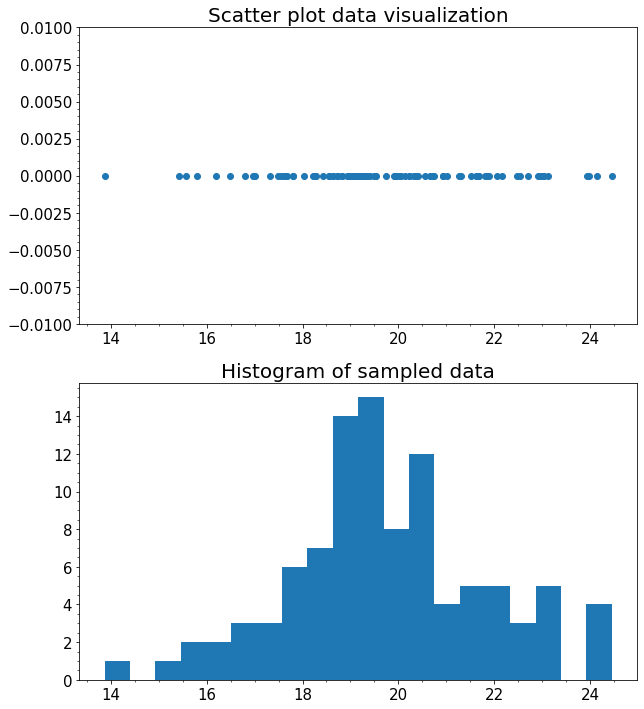

In [16]:
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

fig, ax = plt.subplots(nrows=2, figsize=(10, 12))

ax[0].scatter(sample, [0] * sample.shape[0])
ax[0].set(ylim=(-0.01, 0.01))
ax[0].set_title("Scatter plot data visualization", fontsize=20)
ax[0].minorticks_on()

ax[1].set_title("Histogram of sampled data", fontsize=20)
_ = ax[1].hist(sample, bins=20)
ax[1].minorticks_on()


# Task B + C

In [17]:
# In the case of one gaussian, convergence is directly achieved
iterations = EM.run()

step 0: -1364.968516973676
step 1: -262.0529603100399
step 2: -262.0529603100399
step 3: -262.0529603100399
step 4: -262.0529603100399
step 5: -262.0529603100399
step 6: -262.0529603100399
step 7: -262.0529603100399
step 8: -262.0529603100399
step 9: -262.0529603100399
step 10: -262.0529603100399
step 11: -262.0529603100399
step 12: -262.0529603100399
step 13: -262.0529603100399
step 14: -262.0529603100399
step 15: -262.0529603100399
step 16: -262.0529603100399
step 17: -262.0529603100399
step 18: -262.0529603100399
step 19: -262.0529603100399
step 20: -262.0529603100399
step 21: -262.0529603100399
step 22: -262.0529603100399
step 23: -262.0529603100399
step 24: -262.0529603100399
step 25: -262.0529603100399
step 26: -262.0529603100399
step 27: -262.0529603100399
step 28: -262.0529603100399
step 29: -262.0529603100399
step 30: -262.0529603100399
step 31: -262.0529603100399
step 32: -262.0529603100399
step 33: -262.0529603100399
step 34: -262.0529603100399
step 35: -262.0529603100399
st

In [18]:
# final parameters
final_parameters = EM.return_final_parameters()

print("The final parameters are:")
print("mean value: {}\nstandard deviation: {}\npi: {}".format(
      final_parameters["mu"], final_parameters["sigma"], final_parameters["pi"])
      )
     

The final parameters are:
mean value: [19.741717587120508]
standard deviation: [2.01695928]
pi: [1.0]


* The result shows that the values are not fully recovered. This is due to the small number of samples and the accuracy will be increased by a larger number of samples, as shown in the next steps. Furthermore, in the case of small sample numbers, the fluctuation of the results for different runs is larger.

# Task D
* Run EM algorithm for different sample sizes

In [19]:
final_parameters = []
results = []

for n_samples in [3, 5, 10, 50, 70, 100, 150, 250, 500, 1000, 5000, 10000, 50000, 100000]:
    EM = EMAlgorithm(sample_func=gen_samples, N=n_samples, K_gaussians=1)
    EM.run(print_=False, return_=False)
    final_parameter = EM.return_final_parameters()

    parameter_str = "{} samples:\nmean value: {}\nstandard deviation: {}\npi: {}\n".format(
                    n_samples, final_parameter["mu"], final_parameter["sigma"], final_parameter["pi"]
                    )
    final_parameters.append(parameter_str)
    results.append({"n_samples": n_samples, "mean": final_parameter["mu"][0], 
                    "std": final_parameter["sigma"][0]})
            

print("The final parameters are:")
print("\n".join(final_parameters))

The final parameters are:
3 samples:
mean value: [18.720675264919777]
standard deviation: [1.76735937]
pi: [1.0]

5 samples:
mean value: [22.132495631363682]
standard deviation: [2.48147924]
pi: [1.0]

10 samples:
mean value: [20.64187084433921]
standard deviation: [2.18534395]
pi: [1.0]

50 samples:
mean value: [19.862932062130525]
standard deviation: [2.0938638]
pi: [1.0]

70 samples:
mean value: [20.206601952859742]
standard deviation: [1.96420309]
pi: [1.0]

100 samples:
mean value: [20.16000466489802]
standard deviation: [1.76980175]
pi: [1.0]

150 samples:
mean value: [19.979058483138132]
standard deviation: [1.98108268]
pi: [1.0]

250 samples:
mean value: [20.0181681180323]
standard deviation: [2.02948133]
pi: [1.0]

500 samples:
mean value: [20.002594219884447]
standard deviation: [2.09759958]
pi: [1.0]

1000 samples:
mean value: [19.936882182041177]
standard deviation: [2.02124401]
pi: [1.0]

5000 samples:
mean value: [19.996299177540763]
standard deviation: [2.0233574]
pi: [1

In [20]:
df_results = pd.DataFrame(results)
df_results = df_results.set_index("n_samples")
df_results

,mean,std
n_samples,,
3,18.720675,1.767359
5,22.132496,2.481479
10,20.641871,2.185344
50,19.862932,2.093864
70,20.206602,1.964203
100,20.160005,1.769802
150,19.979058,1.981083
250,20.018168,2.029481
500,20.002594,2.097600


The accuracy increases with an increasing sample number. In the last steps, the deviation is only at the 3rd decimal digit. For small sample numbers, the deviation is quite large but still in a proper region around the exact values.